# Logistic Regression

In [1]:
import pandas as pd
import numpy as np
import pylatex
import matplotlib.pyplot as plt
from math import e, pow
from sklearn.linear_model import LogisticRegression
from random import uniform
import plotly.graph_objects as go

import warnings
warnings.filterwarnings("ignore")

### Sigmoid Function
Want a value between 0 ≤ h(x) ≤ 1.<br>
$$z = xw$$
<br>
$$h(x) = \frac{1}{1 + e^{-z}}$$

### Cost Function
To check how wrong our function is.<br>
If the output should be 1, then, the perfect ln(z) should be ln(1).<br>
But, if the output should be 0, then, the perfect ln(z) should be ln(1 - 0).<br>
<br>
$$C(x) = -\frac{1}{N}\sum_{i=1}^{N}y \cdot ln(h(x^{(i)})) + (1 - y) \cdot (ln(1 - h(x^{(i)})))$$

### Gradient Descent
Minimize the cost function.<br>
$$w_j = w_j - \alpha\frac{\partial{C(x)}}{\partial{w_j}}$$

Chain rule:
$$\frac{\partial{C(x)}}{\partial{w_j}} = \frac{\partial{C(x)}}{\partial{h(x^{(i)})}} \cdot 
\frac{\partial{h(x^{(i)})}}{\partial{z}} \cdot \frac{\partial{z}}{\partial{w_j}}$$

Simplify:
$$\frac{\partial{C(x)}}{\partial{w_j}} = \frac{1}{N}\sum^N_{i=1}(h(x) - y)x_j$$

### Sklearn

In [2]:
df = pd.DataFrame({"temperature":[36.0, 36.2, 38.3, 39.4, 35.7, 37.6, 39.0, 38.0, 37.8],
                   "covid":      [   0,    0,    1,    1,    0,    1,    1,    0,    1]})

In [3]:
X_train = np.array(df["temperature"]).reshape(-1,1)
y_train = np.array(df["covid"])

clf = LogisticRegression(random_state=0)
clf.fit(X_train, y_train)
w = [clf.coef_[0][0], clf.intercept_[0]]
print(w)

[1.1484561819199797, -42.84391861691148]


In [4]:
# get the point in which we decide if someone has covid or not
# left of the point, don't have covid
# right of the point, have covid
point = (0.5 - w[1]) / w[0]

In [5]:
# get line (only for graphs)
x = [point, point]
y = [0, 1]

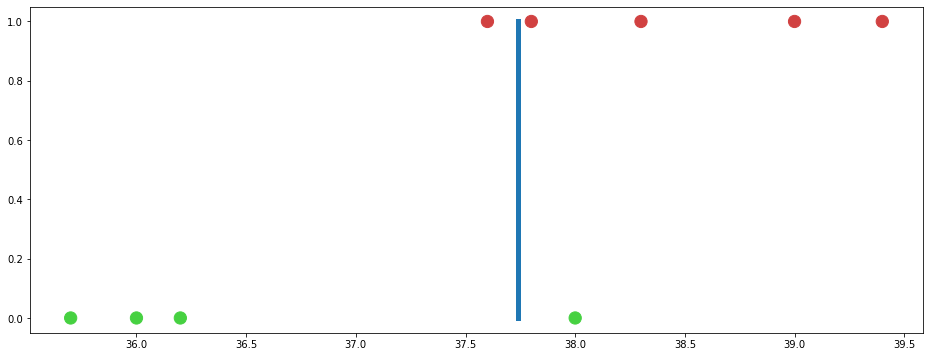

In [6]:
colors = ["#d14141" if y==1 else "#46d141" for y in df["covid"]]
plt.figure(figsize=(16, 6))
plt.scatter(df["temperature"], df["covid"], 150, colors)
plt.plot(x, y, linewidth=5)

### Sklearn Two Features

In [7]:
df = pd.DataFrame({"f1":    [30, 42,  45, 72, 68, 24, 102, 76,  69,  92,  54],
                   "f2":    [ 1,  2, 1.8, .5, .8,  2,   3,   2, 1.9,  3, 2.5],
                   "target":[ 0,  0,   0,  0,  0,  0,   1,   1,   1,  1,   1]})

In [8]:
X_train = np.array(df[["f1", "f2"]])
y_train = np.array(df["target"])

clf = LogisticRegression(random_state=0)
clf.fit(X_train, y_train)
w = [clf.coef_[0][0], clf.coef_[0][1], clf.intercept_[0]]
print(w)

[0.11098885258632152, 1.2389347470669259, -9.168621673909481]


In [9]:
# only for graphs
def getLine():
    x = []
    min_ = int(df["f2"].min() * 10)
    max_ = int(df["f2"].max() * 10)
    
    for i in range(min_, max_):
        x1 = i/10
        x0 = (0.5 - w[2] - x1 * w[1])/w[0]
        x.append([x0, x1])
        
    return x

x = getLine()
test = pd.DataFrame({"f1":[i[0] for i in x], "f2":[i[1] for i in x]})

Text(0.5, 1.0, 'Real')

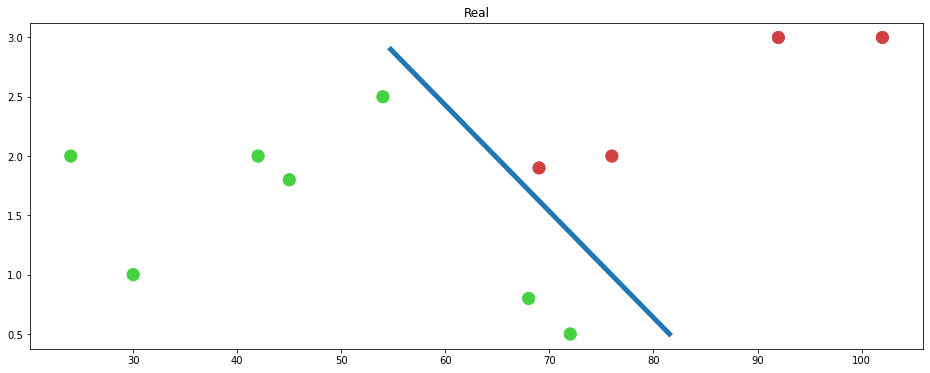

In [10]:
colors = ["#d14141" if y==1 else "#46d141" for y in clf.predict(X_train)]
plt.figure(figsize=(16, 6))
plt.scatter(df["f1"], df["f2"], 150, colors)
plt.plot(test["f1"], test["f2"], linewidth=5)
plt.title("Real")

Text(0.5, 1.0, 'Predicted')

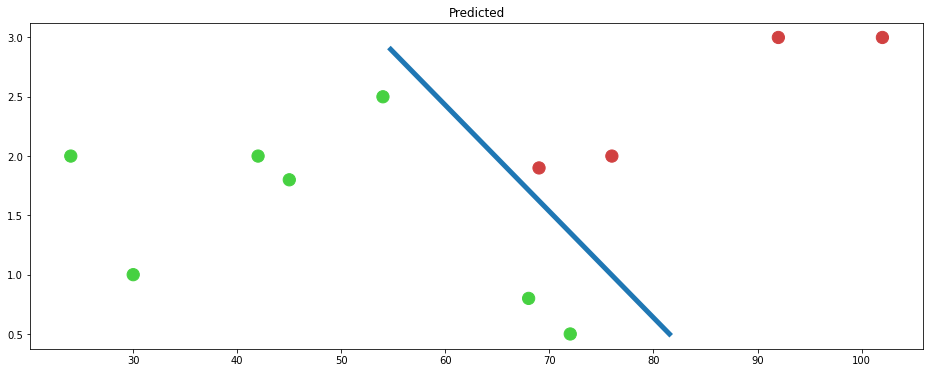

In [11]:
colors = ["#d14141" if y==1 else "#46d141" for y in clf.predict(X_train)]
plt.figure(figsize=(16, 6))
plt.scatter(df["f1"], df["f2"], 150, colors)
plt.plot(test["f1"], test["f2"], linewidth=5)
plt.title("Predicted")

## Scratch

### Gradient Descent with One Feature

In [12]:
df = pd.DataFrame({"temperature":[36.0, 36.2, 38.3, 39.4, 35.7, 37.6, 39.0, 38.0, 37.8],
                   "covid":      [   0,    0,    1,    1,    0,    1,    1,    0,    1]})

In [13]:
X_train = np.array([[i, 1] for i in df["temperature"].values])
y_train = np.array(df["covid"])

In [14]:
def train(verbose=False):
    learning_rate = 0.005
    iterations = 1000000
    w = np.array([uniform(0, 1) for i in range(len(X_train[0]))]).reshape(-1,1)
    N = len(X_train)
    v = iterations // 10
    
    for i in range(iterations):
        # gradient descent
        z = X_train.dot(w)
        h = 1/(1 + np.exp(-z))
        cost = h - y_train.reshape(-1,1)
        result = cost.transpose().dot(X_train)
        sum_ = result / N
        w -= learning_rate * sum_.transpose()
        
        if (verbose and i % v == 0):
            # cost function
            z = X_train.dot(w)
            h = 1/(1 + np.exp(-z)).transpose()[0]
            cost = (-y_train * np.log(h) - (1 - y_train) * np.log(1 - h)).mean()
            print("Error:", cost)
        
    return w
        
w = train(verbose=True).transpose()[0]
print("\nw = ", w)

Error: 7.54755975814021
Error: 0.6152030070601326
Error: 0.5604919724790701
Error: 0.518216446173542
Error: 0.48513275064114253
Error: 0.45887672325869755
Error: 0.43774461947310633
Error: 0.4205074114484986
Error: 0.40627164253185744
Error: 0.3943805088257359

w =  [  0.98705626 -36.76908636]


In [15]:
# only for graphs
point = (0.5 - w[1]) / w[0]
x = [point, point]
y = [0, 1]
print(point)

37.75781362082336


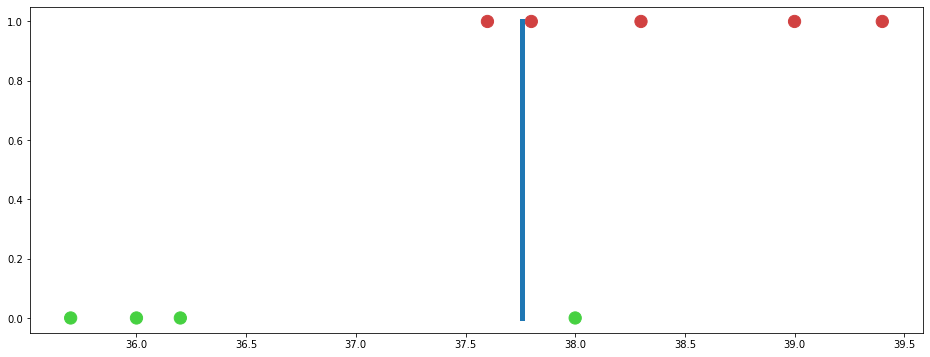

In [16]:
colors = ["#d14141" if y==1 else "#46d141" for y in df["covid"]]
plt.figure(figsize=(16, 6))
plt.scatter(df["temperature"], df["covid"], 150, colors)
plt.plot(x, y, linewidth=5)